# Assignment 3: Classification with Logistic Regression

# Total: /100

## Instructions

* Complete the assignment

* Once the notebook is complete, restart your kernel and rerun your cells

* Submit this notebook to owl by the deadline

* You may use any python library functions you wish to complete the assignment.

## The Dataset

The dataset contains transactions made by credit cards in September 2013 by European cardholders. 
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. \[You will learn about PCA in a later Lesson.\] Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

You can read more about the data and the variables [here](https://www.kaggle.com/mlg-ulb/creditcardfraud).

In [6]:
# You may need these
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc


import matplotlib.pyplot as plt
%matplotlib inline

## Question 1: /5 pts

Read in the `creditcard.csv` dataset and display the first 5 rows.


In [7]:
# Question 1 code here
creditcard_data = pd.read_csv("~/Desktop/CS4414/A3/creditcard.csv")
print(creditcard_data.head())
print(creditcard_data.shape)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

## Question 2: /5 pts

Then split the data into train and test for the outcome/response and the predictor variables. Hold out 50% of observations as the test set.  Pass `random_state=0` to `train_test_split` to ensure you get the same train and tests sets as the solution.

In [52]:
# Question 2 code here.
X = creditcard_data.drop('Class', axis='columns').values
y = creditcard_data.Class.values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, random_state=0)
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)
print(Xtrain[:,29])
train_data.Class.value_counts()
train_data,test_data = train_test_split(creditcard_data,random_state=0)
print(train_data.shape)
print(test_data.shape)
train_data.Class.value_counts()

(142403, 30)
(142404, 30)
(142403,)
(142404,)
[  7.99   1.29   1.98 ...  34.9  171.31  15.99]
(213605, 31)
(71202, 31)


0    213233
1       372
Name: Class, dtype: int64

## Question 3: /5 pts

Read the documentation for [sklearn's `LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).  In no more than 2 sentences per bullet point, answer the following in your own words.

* Does `LogisticRegression` use a penalty by default?  If yes, what penalty?

Yes, LogisticRegression uses L2 penalty, or the "ridge" penalty. 
    
* If we apply a penalty during learning, what difference do you expect to see in the resulting coefficients, relative to not applying a penalty during learning?

There will be a high number of optimal solutions.
    
* If using the default settings of `LogisticRegression` in `sklearn`, should you include a column of 1s in your feature/design matrix? Briefly explain why or why not.

Yes, or there will be an error showing "use 2D array instead of 1D array"


## Question 4: /15 pts

Create a instance of sklearn's `LogisticRegression` object for unpenalized logistic regression. Note: If you get a warning about convergence of `coef_`, try increasing the `max_iter` parameter.  I used `max_iter=10000` which seems to supress the warning.

Using this object, **run a logisitic regression analysis** of `Class` (y-variable) against `Amount` (x-variable) using your training data. 

Then **make a plot with three main components based on the analysis**:
1. Scatter-plot of `Amount` and `Outcome` on your test data
2. A curve showing the prediction (0 or 1, using `predict` - this curve will jump between 0 and 1) as a function of `Amount`
3. A curve showing the predicted probability of a positive outcome (using `predict_proba`) as a function of `Amount`. Note that `predict_proba` will return both p(Outcome=0) and p(Outcome=1) in an array.

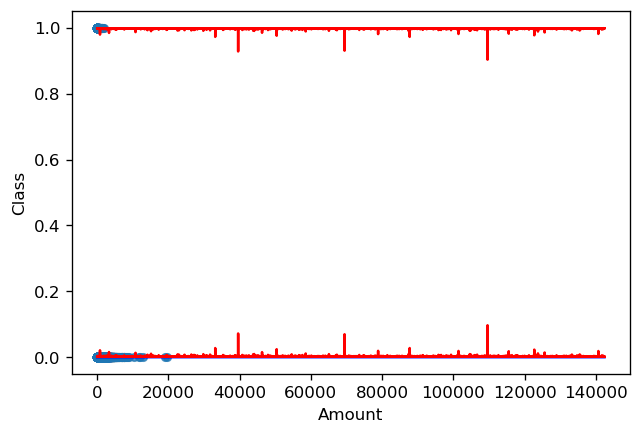

In [55]:
# Question 4 code here
LOGREG = LogisticRegression(penalty='none',max_iter=10000)
y = ytrain
x = np.c_[np.ones(np.size(Xtrain[:,29])), Xtrain[:,29]]
fit = LOGREG.fit(x, ytrain)
fig, ax = plt.subplots(dpi = 120)
train_data.plot.scatter(x = 'Amount', y ='Class', ax = ax, alpha = 0.75)
predicted = fit.predict(x)
predict_proba = fit.predict_proba(x)
ax.plot(predicted, color = 'blue', label = 'Predicted')
ax.plot(predict_proba, color = 'red', label = 'Predicted_proba')

## Question 5: 15 pts

Compute the label-based criteria we discussed in the Lesson for your amount-only classifier **using the test data**. Use a threshold of 0.5. Answer the questions in this text box below.

* How many of the test instances are labeled positive by your classifier?

249.

* Choose one of the positively-labeled test instances, and explain why the classifier labeled it positive.

The classifier labeled it positive because the it was predicted using logistic regression.

* Is this classifier useful for finding fraudulent transactions? Explain in one or two sentences.

This classifier is not useful for finding fraudulent transactions, the classifier labels all transcations as fraudulent no matter what the amount or other variables are.


In [56]:
# Calculate performance measures from scratch
# TP: true postives 
# TN: true negatives 
# FP: False positives 
# FN: False negatives
def compute_performance(yhat, y, classes):
    # First, get tp, tn, fp, fn
#     tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
#     tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
#     fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
#     fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))
    tp = sum(np.logical_and(yhat == 1, y == 1))
    tn = sum(np.logical_and(yhat == 0, y == 0))
    fp = sum(np.logical_and(yhat == 1, y == 0))
    fn = sum(np.logical_and(yhat == 0, y == 1))
    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    # "Of the ones I labeled +, how many are actually +?"
    precision = tp / (tp + fp)
    
    # Recall
    # "Of all the + in the data, how many do I correctly label?"
    recall = tp / (tp + fn)    
    
    # Sensitivity
    # "Of all the + in the data, how many do I correctly label?"
    sensitivity = recall
    
    # Specificity
    # "Of all the - in the data, how many do I correctly label?"
    specificity = tn / (fp + tn)
    
    # Print results
    
    print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3),
          "Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3))

## Put code here to compute criteria:
compute_performance(predicted,y,train_data.Class)

## Put code here to compute whatever else you might need to answer the question.



tp: 0 tn: 142154 fp: 0 fn: 249
Accuracy: 0.998 Recall: 0.0 Precision: nan Sensitivity: 0.0 Specificity: 1.0


<ipython-input-56-85bfaa9358e3>:23: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp / (tp + fp)


## Question 6: /10 pts
Now fit a logistic regression model to the training data and include all the variables in the data frame (except for `Class`) in the cell below. You will want to make a new object like you did for the simpler model. Answer the following question.

* According to this more complex model, are larger or smaller Amounts more strongly associated with fraud, if all other variables are held equal?

Smaller amounts are more strongly associated with fraud, the predicted model shows that smaller amount is more suspectable of fraud.


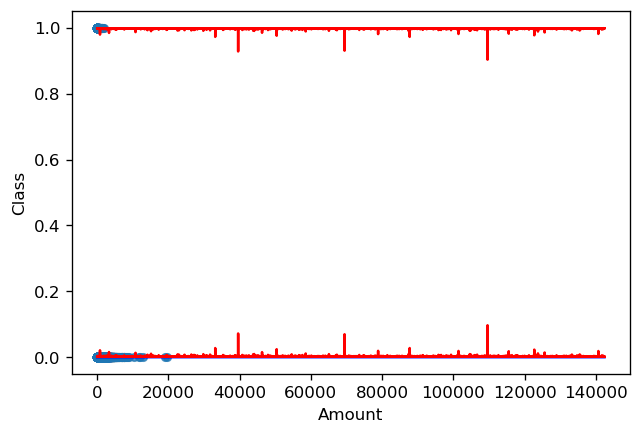

In [59]:
# Code for Question 6
y = ytrain
x_all = Xtrain
fit = LogisticRegression(max_iter=10000).fit(x_all, y)
fig, ax = plt.subplots(dpi = 120)
train_data.plot.scatter(x = 'Amount', y ='Class', ax = ax, alpha = 0.75)
predicted_all = fit.predict(x_all)
predict_proba_all = fit.predict_proba(x_all)
ax.plot(predicted, color = 'blue', label = 'Predicted')
ax.plot(predict_proba, color = 'red', label = 'Predicted_proba')


## Question 7: /15 pts

In the cell below, Compute the label-based criteria we discussed in the Lesson for new classifier using the test data. (You don't have to copy the function down into this cell; just call it again here.) Use a threshold of 0.5. Answer the questions in this text box below.

* How many of the test instances are labeled positive by your classifier?

164 + 28 = 192

* Is this classifier **better or worse than the amount-only classifier** for finding fraudulent transactions? Explain in one or two sentences.*

This classifier is better than the amount-only classifier for finding fraudulent transactions beacuse it cosidered more variables and it provides a more concret prediction. By looking at the evaluating classifiers we know that this classifier is better.


In [60]:
# Code for Question 7

compute_performance(predicted_all,y,train_data.Class)

tp: 164 tn: 142126 fp: 28 fn: 85
Accuracy: 0.999 Recall: 0.659 Precision: 0.854 Sensitivity: 0.659 Specificity: 1.0


# Question 8: /15 pts

Plot ROC curves for both of your classifiers using the cells below, then answer the following questions, computing whatever quantities you need to answer them.

* Which classifier has a higher estimated probability of correctly distinguishing between a positive and a negative instance? How do you know?

Amount-only classifier has a higher estimated probability of correctly distinguishing between a positive and a negative instance, because it's area under curve is higher than the other classifier.

* How could you explain a result where a logistic regression classifier produces an AUROC that is "worse than random", i.e. less than 0.5, even on its training set?

When we are getting a AUROC between 0 - 0.5, that means we might have a bad training algorithm, or a mistake in labelling the classifier targets.


/Users/DavidShang/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.5382365456592609

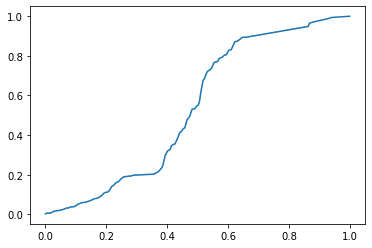

In [61]:
# ROC for Amount-only classifier
fpr, tpr, _ = roc_curve(y, predict_proba[:,1], pos_label=0)
ax=sns.lineplot(fpr,tpr)
auc(fpr,tpr)

/Users/DavidShang/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.04029938570495385

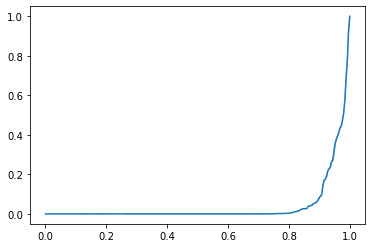

In [62]:
# ROC for all-variable classifier
fpr, tpr, _ = roc_curve(y, predict_proba_all[:,1], pos_label=0)
ax=sns.lineplot(fpr,tpr)
auc(fpr,tpr)

# Question 9: /15 pts

Plot precision-recall curves for both of your classifiers using the cell below. Be sure to label your axes.

* Which classifier is preferable if we want to recover at least 60% of fraudulent transactions?

If we want to recover at least 60% of fraudulent transactions, amount-only classifier is preferable beacuse the amount-only classifier have at least some ability to stop fraudulent transactions while all-variable classifier tends to randomly stop fraudulent transactions since it did not classifies its variables properly.


/Users/DavidShang/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: x is neither increasing nor decreasing : [0.99825144 0.99834615 0.99835615 ... 1.         1.         1.        ].

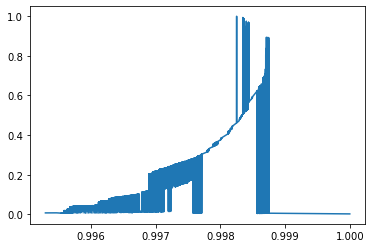

In [66]:
# PRC for Amount-only classifier
fpr, tpr, _ = precision_recall_curve(y, predict_proba[:,1], pos_label=0)
ax=sns.lineplot(fpr,tpr)
auc(fpr,tpr)

/Users/DavidShang/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: x is neither increasing nor decreasing : [0.99825144 0.99825143 0.99825142 ... 0.         0.         1.        ].

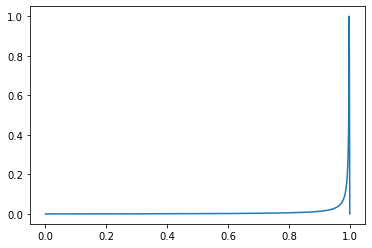

In [67]:
# PRC for all-variable classifier
fpr, tpr, _ = precision_recall_curve(y, predict_proba_all[:,1], pos_label=0)
ax=sns.lineplot(fpr,tpr)
auc(fpr,tpr)